In [2]:
#!conda install -c anaconda xlrd --yes
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
df=pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)
df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [170]:
df=df.sort_values('Very interested', ascending=False)
df=df/233
df=df.round(2)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,7.24,1.91,0.26
Machine Learning,6.99,2.05,0.32
Data Visualization,5.75,3.15,0.44
Big Data (Spark / Hadoop),5.72,3.13,0.55
Deep Learning,5.42,3.30,0.58
Data Journalism,1.84,4.64,2.62


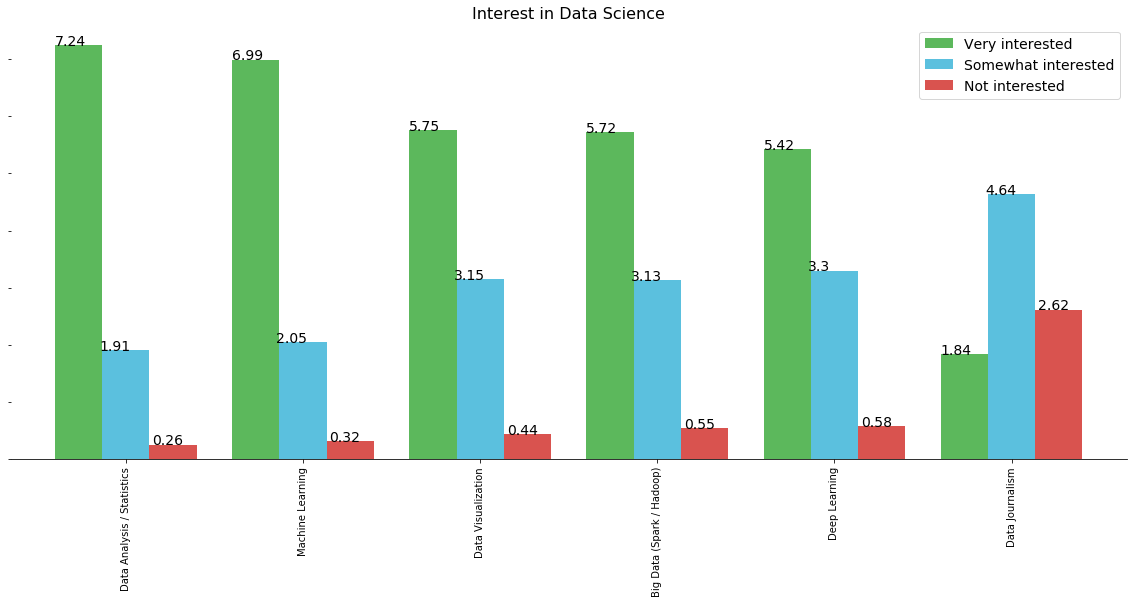

In [208]:
%matplotlib inline
import matplotlib as mpl

ds_plot=df.plot(kind='bar', figsize=(20,8),width=0.8,color=['#5cb85c','#5bc0de','#d9534f'])
ds_plot.legend(fontsize=14)
ds_plot.axes.yaxis.set_ticklabels([])
ds_plot.set_title('Interest in Data Science', fontsize=16) 
ds_plot.spines['top'].set_visible(False)
ds_plot.spines['left'].set_visible(False)
ds_plot.spines['right'].set_visible(False)

for i in range(df.shape[0]):
    ds_plot.annotate(float(df.iloc[[i],0]),xy=(i-0.4,float(df.iloc[[i],0])), fontsize=14)
    ds_plot.annotate(float(df.iloc[[i],1]),xy=(i-0.15,float(df.iloc[[i],1])), fontsize=14)
    ds_plot.annotate(float(df.iloc[[i],2]),xy=(i+0.15,float(df.iloc[[i],2])),fontsize=14)


In [42]:
df1=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df1['Count']=df1['PdDistrict']
#df2=df1['PdDistrict']
#df2['Count']=df2['PdDistrict']
df2=df1.groupby('PdDistrict').count()
df2.reset_index(inplace=True)
df3=df2[['PdDistrict','Count']].rename(columns={'PdDistrict':'Neighborhood'})
df3

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [114]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

!wget --quiet https://cocl.us/sanfran_geojson/san-francisco.json -O san-francisco.json
    
world_geo = r'san-francisco.json'


latitude = 37.77
longitude = -122.42

world_map = folium.Map(location=[latitude, longitude], zoom_start=12)   


#world_map.choropleth(
    #geo_data=world_geo,
    #data=df3,
    #columns=['Neighborhood', 'Count'],
    #key_on='features.properties.DISTRICT',
    #fill_color='YlOrRd', 
    #fill_opacity=0.7, 
    #line_opacity=0.2,
    #legend_name='Crime in San Francisco',
    #reset=True
#)

# display map
world_map
